# Homework 3
## José MORAN

In [1]:
%pylab inline
%precision 4
import numpy as np 
import matplotlib.pyplot as plt 
from numba import jit 

pi = np.pi

Populating the interactive namespace from numpy and matplotlib


## Part I 

1. We write the corresponding program, as well as an analytical solution for the density matrix, to check the convergence of our script. The value of $N$ is given by $2^n$. We are doing our calculations for a harmonic oscillator, with $V(x)=\frac{x^2}{2}$ and with $m=\hbar=1$.

In [2]:
def recursion(f,g,c):
    f_p = 2*(f*g)/(f+g)
    g_p = (f+g)/2
    c_p = c**2*np.sqrt(2*pi)/(2*np.sqrt(g_p))
    return f_p,g_p,c_p

def apply_rec(n, beta=8.):
    beta_p = beta/(2**n)
    f = beta_p/4.
    g = 1./beta_p+beta_p/4.
    c = 1./np.sqrt(2*pi*beta_p)
    for i in xrange(n):
        f,g,c = recursion(f,g,c)
    return f,g,c

def analytical_density(x,x_p,beta=8):
    return 1./np.sqrt(2*pi*np.sinh(beta))*np.exp(-(x+x_p)**2/4.*np.tanh(beta/2.)\
                                                -(x-x_p)**2/(4*np.tanh(beta/2.)))

def density_matrix(x,x_p,f,g,c):
    return c*np.exp(-g*(x-x_p)**2/2.-f*(x+x_p)**2/2.)


In [3]:
ns = np.arange(0,15)
steps = [8./2**n for n in ns]
results = []

for n in ns: 
    f,g,c = apply_rec(n)
    results.append(density_matrix(0,0,f,g,c))

2. We now plot the calculated density at the origin $\pi (0)$ using our recursion algorithm alongside the analytical result.

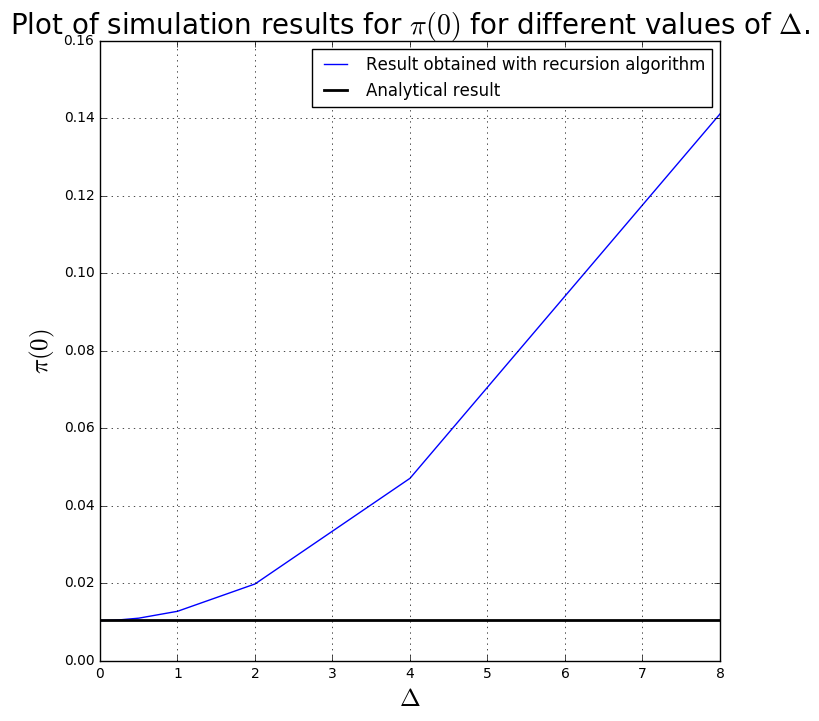

In [4]:
figure = plt.figure(figsize=(8,8))
plt.plot(steps,results, ls = '-', label = 'Result obtained with recursion algorithm')
plt.axhline(y=analytical_density(0,0), xmin=0, xmax=8, lw=2, color = 'k', label = "Analytical result")
plt.legend()
plt.title("Plot of simulation results for $\pi(0)$ for different values of $\Delta$.", fontsize=20)
plt.xlabel("$\Delta$", fontsize = 18)
plt.ylabel("$\pi (0)$", fontsize = 18)
plt.grid()
plt.show()
plt.close()

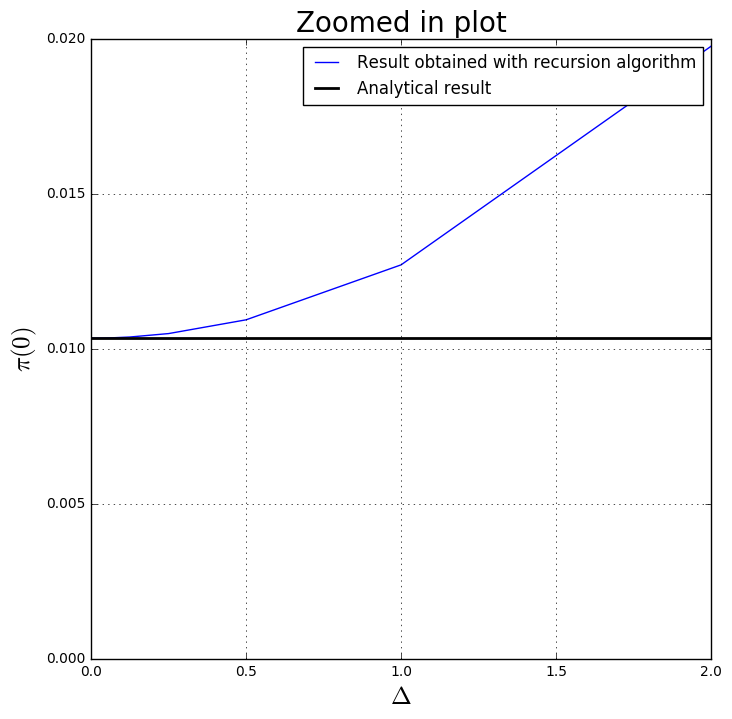

In [5]:
figure = plt.figure(figsize=(8,8))
plt.plot(steps,results, ls = '-', label = 'Result obtained with recursion algorithm')
plt.axhline(y=analytical_density(0,0), xmin=0, xmax=8, lw=2, color = 'k', label = "Analytical result")
plt.legend()
plt.title("Zoomed in plot", fontsize=20)
plt.xlabel("$\Delta$", fontsize = 18)
plt.ylabel("$\pi (0)$", fontsize = 18)
plt.xlim(0,2)
plt.ylim(0,0.02)
plt.grid()
plt.show()
plt.close()

The recursion does indeed seem to converge as $\Delta$ gets smaller. To check how it converges in function of $\Delta$, let's look at a log-log plot and calculate the slope : 

In [6]:
error = np.absolute(results-analytical_density(0,0))

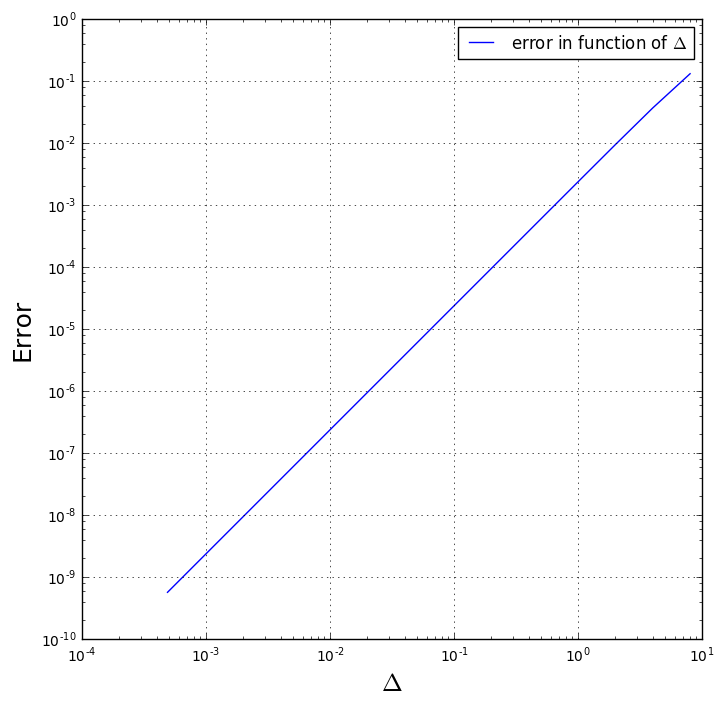

In [7]:
figure = plt.figure(figsize=(8,8))
plt.plot(steps,error, ls = '-', label = 'error in function of $\Delta$')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel("$\Delta$", fontsize = 18)
plt.ylabel("Error", fontsize = 18)
plt.grid()
plt.show()
plt.close()

In [8]:
for i in xrange(len(error)-1):
    print "Calculated log-log slope between points "+str(i+1)+" and "+str(i)+": "\
    +str((np.log(error[i+1])-np.log(error[i]))/(np.log(steps[i+1])-np.log(steps[i])))

Calculated log-log slope between points 1 and 0: 1.83325637735
Calculated log-log slope between points 2 and 1: 1.96173067769
Calculated log-log slope between points 3 and 2: 1.99345408805
Calculated log-log slope between points 4 and 3: 1.99857707366
Calculated log-log slope between points 5 and 4: 1.99964436279
Calculated log-log slope between points 6 and 5: 1.99991057935
Calculated log-log slope between points 7 and 6: 1.99997760238
Calculated log-log slope between points 8 and 7: 1.99999439794
Calculated log-log slope between points 9 and 8: 1.99999859986
Calculated log-log slope between points 10 and 9: 1.99999965529
Calculated log-log slope between points 11 and 10: 2.00000001153
Calculated log-log slope between points 12 and 11: 2.0000010101
Calculated log-log slope between points 13 and 12: 2.00000401574
Calculated log-log slope between points 14 and 13: 2.00007297947


We find that the error scales as $\Delta^2$. This is normal, as the Trotter formula tells us that : 

$e^{-\Delta (H_0+V)} = e^{-\frac{\Delta}{2}V}e^{-\Delta H_0}e^{-\frac{\Delta}{2}V}+\Delta^2[H,V]+o\left(\Delta^2\right)$ 

(This can be obtained by using the series expression for the exponential and regrouping terms). 

Applying this to the density matrix in position basis we get that : 

$\rho (x,x',\Delta)=e^{-\frac{\Delta}{2}V(x)}\rho_{free}(x,x',\Delta)e^{-\frac{\Delta}{2}V(x')}+\Delta^2\cdot f(x,x')+o\left(\frac{\beta^2}{N^2}\right)$.

Where f is a given function.

Which tells us indeed that at small $\Delta$ we get the following scaling for the error :

$\mathrm{err}(\Delta)=|\rho (x,x',\Delta) - e^{-\frac{\Delta}{2}V(x)}\rho_{free}(x,x',\Delta)e^{-\frac{\Delta}{2}V(x')} | \sim \Delta^2$

## Part II
1. We will now give an expression for the average energy using the path-integral formulation : 


According to the definition, we have : 

$\langle E \rangle = \frac{\int \mathrm{d}x \mathrm{H}_x\rho(x,x'\rightarrow x, \beta)}{\int \mathrm{d}x \rho(x,x, \beta)}$  

Let's calculate the term $  \mathrm{H}_x\rho(x,x'\rightarrow x, \beta)$. We have that : 

$\begin{align*}
H_x \rho(x,x',\beta_1+\beta_2)&=\langle x | H_x e^{-(\beta_1+\beta_2) H}|x'\rangle \\
&= \int \mathrm{d}x_1 \langle x | H_x e^{-\beta_1 H}|x_1\rangle\langle x_1|e^{-\beta_2 H}|x'\rangle \\
&= \int \mathrm{d}x_1 (H_x \rho)(x,x_1,\beta_1)\rho(x_1,x',\beta_2)
\end{align*}$

And we can therefore state that:

$H_x\rho(x,x'\rightarrow x, \beta)=\int \left(\prod_{i=1}^{N-1} \mathrm{d}x_i\right) H_x\rho(x,x_1,\frac{\beta}{N})\rho(x_1,x_2,\frac{\beta}{N})\ldots\rho(x_{N-1},x'\rightarrow x,\frac{\beta}{N}) $

Since $H_x$ only acts on the first term of the integral we can indeed write : 

$H_x\rho(x,x'\rightarrow x, \beta)=\int \left(\prod_{i=1}^{N-1} \mathrm{d}x_i\right) H_x\rho(x,x_1,\frac{\beta}{N})\rho(x_1,x_2,\frac{\beta}{N})\ldots\rho(x_{N-1}, x,\frac{\beta}{N}) $

And now setting $x_0=x_N=x$ and integrating over this variable we get : 

$\begin{align*}
\int \mathrm{d}x H_x\rho(x,x'\rightarrow x, \beta) &= \int \prod_{i=0}^{N-1} \mathrm{d}x_i \left(H_{x_0} \rho(x_0,x_1,\frac{\beta}{N})\right) \rho(x_1,x_2,\frac{\beta}{N})\ldots \rho(x_{N-1},x_N=x_0,\frac{\beta}{N})\\
&= \int \left(\prod_{i=0}^{N-1}\mathrm{d}x_i \rho(x_i,x_{i+1},\frac{\beta}{N})\right)\left(\frac{H_{x_0}\rho(x_0,x_1,\frac{\beta}{N})}{\rho(x_0,x_1,\frac{\beta}{N})}\right)
\end{align*}$

Where we divided and multiplied by $\rho(x_0,x_1,\frac{\beta}{N})$ in the last step. So finally we have : 

$\begin{align*} 
\langle E \rangle &= \frac{\int \mathrm{d}x \mathrm{H}_x\rho(x,x'\rightarrow x, \beta)}{\int \mathrm{d}x \rho(x,x, \beta)}\\
&=\frac{ \int \left(\prod_{i=0}^{N-1}\mathrm{d}x_i \rho(x_i,x_{i+1},\frac{\beta}{N})\right)\left(\frac{H_{x_0}\rho(x_0,x_1,\frac{\beta}{N})}{\rho(x_0,x_1,\frac{\beta}{N})}\right)  }{  \int \left(\prod_{i=0}^{N-1}\mathrm{d}x_i \rho(x_i,x_{i+1},\frac{\beta}{N})\right)}\\
&= \langle \frac{H_{x_0}\rho(x_0,x_1,\frac{\beta}{N})}{\rho(x_0,x_1,\frac{\beta}{N})}\rangle
\end{align*}$

Where the last average is taken over paths $(x_0,x_1,\ldots,x_{N-1})$ weighed with the measure :

$\frac{\prod_{i=0}^{N-1}\mathrm{d}x_i \rho(x_i,x_{i+1},\frac{\beta}{N})}{\int \prod_{i=0}^{N-1}\mathrm{d}x_i \rho(x_i,x_{i+1},\frac{\beta}{N})}$

2 . Furthermore, at the large N limit, using the Trotter approximation is legitimate (large N means $\frac{\beta}{N}$ is small, meaning we have large temperature), we can use the high-temperature approximation for the density matrix. Meaning that, writing $\frac{\beta}{N}=t$ and using $\rho(x_0,x_1,t) \underset{t\rightarrow 0}{=}\frac{1}{\sqrt{2\pi t}}\mathrm{exp}\left(-\frac{t}{4}(x_0^2+x_1^2)-\frac{1}{2t}(x_0-x_1)^2\right)$

$\begin{align*}
H_{x_0}\rho(x_0,x_1,t) &= \left(-\frac{1}{2}\frac{\mathrm{d}^2}{\mathrm{d}x_0^2}+V(x_0) \right)\rho(x_0,x_1,t)\\
&= \left(\frac{x_0^2}{2}+\frac{1}{2}\left(\frac{t}{2}+\frac{1}{t}\right)-\frac{1}{2}\left(\frac{x_0-x_1}{t}+\frac{tx_0}{2} \right)^2 \right)\rho(x_0,x_1,t)\\
&= \left(\frac{x_0^2}{2}+\frac{2t^3+4t-4(x_0-x_1)^2-4t^2x_0(x_0-x_1)-t^4x_0^2}{8t^2}\right)\rho(x_0,x_1,t)
\end{align*}$

Substituting into the previous expression, we get :

$\langle E \rangle = \langle \frac{x_0^2}{2}+\frac{2t^3+4t-4(x_0-x_1)^2-4t^2x_0(x_0-x_1)-t^4x_0^2}{8t^2} \rangle $

Which is the desired formula.

3 . Let's now implement this estimator : 

In [9]:
from math import pi, exp, sqrt
from random import uniform as ran, randint as nran
def rho_free(x,xp,beta):
    return exp( - (x-xp)**2 / (2.*beta) )


def simulate(N,beta,delta,iters = 2**20):
    del_tau = beta/N
    results = []
    x = [0. for k in range(N)]
    for iter in range(iters):
        k = nran(0,N-1)
        x_old = x[k]
        x_new = x_old + ran(-delta,delta)
        xp = x[(k+1)%N]
        xm = x[k-1]
        pi_old = rho_free(xm,x_old,del_tau)*rho_free(x_old,xp,del_tau) * \
          exp(-del_tau*x_old**2/2.)
        pi_new = rho_free(xm,x_new,del_tau)*rho_free(x_new,xp,del_tau) * \
          exp(-del_tau*x_new**2/2.)
        Upsilon = pi_new/pi_old
        if (ran(0,1) < Upsilon): x[k] = x_new
        measure = x[0]**2/2.+(1./(8*del_tau**2))*(2*del_tau**3+4*del_tau-4*(x[0]-x[1])**2\
                                                     -4*del_tau**2*x[0]*(x[0]-x[1])-del_tau**4*x[0]**2)
        results.append(measure)

    return results


def bunching(array):

    new_array = []
    while array!=[]:
        x = array.pop()
        y = array.pop()
        new_array.append((x+y)/2.)
    return new_array

def get_error(array, iters=20):
    error = []
    array_copy = list(array)
    for i in xrange(iters):
        error.append(np.std(array_copy)/np.sqrt(len(array_copy)))
        array_copy = bunching(array_copy)
    return error

We will do the calculations for different values of temperature $\beta$ and different discretisations $N$. We will then use the bunching algorithm to calculate the error. We are doing around $2^{2}$ steps, allowing us to do $20$ bunching iterations. Since the bunching algorithm is supposed to converge to the real error, but has some statistical noise in the last iterations, we will take the largest calculated error as an estimation for our error.

In [10]:
betas = [0.5,1.,5.,10.]
Ns = [4,8,12]
def average_energy(beta):
    return 0.5+1./(np.exp(beta)-1.)

In [11]:
result_list = []
error_list = []
analytical_list = []
for beta in betas:
    print "==================================="
    print "Calculating for beta = "+str(beta)
    analytical_list.append(average_energy(beta))
    temp_result_beta = []
    error_result_beta = []
    for N in Ns:
        print "        N = "+str(N)+".........",
        result = simulate(N, beta, 0.5)
        error = get_error(result)
        temp_result_beta.append(np.mean(result))
        error_result_beta.append(error)
        print "done"
    result_list.append(temp_result_beta)
    error_list.append(error_result_beta)

Calculating for beta = 0.5
        N = 4......... done
        N = 8......... done
        N = 12......... done
Calculating for beta = 1.0
        N = 4......... done
        N = 8......... done
        N = 12......... done
Calculating for beta = 5.0
        N = 4......... done
        N = 8......... done
        N = 12......... done
Calculating for beta = 10.0
        N = 4......... done
        N = 8......... done
        N = 12......... done


In [12]:
for i in xrange(len(betas)):
    print "==========================================================="
    print "For beta = "+str(betas[i])
    print "   Analytical result :"
    print "      <E> = "+str(analytical_list[i])
    print "   Numerical results :"
    for j in xrange(len(Ns)):
        print "      for N = "+str(Ns[j])+", <E> = "+str(result_list[i][j])+" +/ "+str(np.max(error_list[i][j]))\
        +",  deviation from analytical value : "+str(abs(result_list[i][j]-analytical_list[i]))

For beta = 0.5
   Analytical result :
      <E> = 2.04149408254
   Numerical results :
      for N = 4, <E> = 2.01821879972 +/ 0.0523839455344,  deviation from analytical value : 0.0232752828182
      for N = 8, <E> = 1.93367897558 +/ 0.159368494786,  deviation from analytical value : 0.107815106952
      for N = 12, <E> = 1.73956757359 +/ 0.310187461959,  deviation from analytical value : 0.301926508949
For beta = 1.0
   Analytical result :
      <E> = 1.08197670687
   Numerical results :
      for N = 4, <E> = 1.0877115198 +/ 0.0229073760659,  deviation from analytical value : 0.00573481293285
      for N = 8, <E> = 1.13852714633 +/ 0.0467953866545,  deviation from analytical value : 0.0565504394654
      for N = 12, <E> = 1.23740398837 +/ 0.0838856575719,  deviation from analytical value : 0.155427281505
For beta = 5.0
   Analytical result :
      <E> = 0.506783654906
   Numerical results :
      for N = 4, <E> = 0.51461134491 +/ 0.00278073685646,  deviation from analytical value : 

We can see that we get values that are reasonably close to the actual value. For $N=8$, we always seem to get a result within the error bar (except for large $\beta$, where the error in discretization is still too large). For $N=4$ and $N=12$, we get results that are sometimes outside of the error bar. 

This can be easily explained : 
* For a small value of $N$, like 4, the discretization is not good enough and the source of the error comes from the Trotter approximation : we are not discretizing enough.
* For a large value of $N$, like 12, the actual reason we are getting a large error and sometimes get a result out of the error bar is that we have a long correlation time. Indeed, with a path that is made of many points, each Metropolis move only changes the path slightly. Thus, with each Metropolis step we get a path that is very similar to the previous. This may also be amplified by the fact that we kept the same value of $\delta$ for all of our simulations. Indeed, with a larger value of $N$, the distance between points in the path is smaller, and we should have used a smaller $\delta$ to get a better acceptance rate and thus a smaller correlation time and error (doing all of this would have taken more time, both in coding and in calculations). 


In the following figure, we plot the evolution of the bunching error for the last simulation, with $\beta=10$ and $N=12$. Its erratic behaviour at large bunching iteration justifies the fact that we take the maximum of the calculated errors.

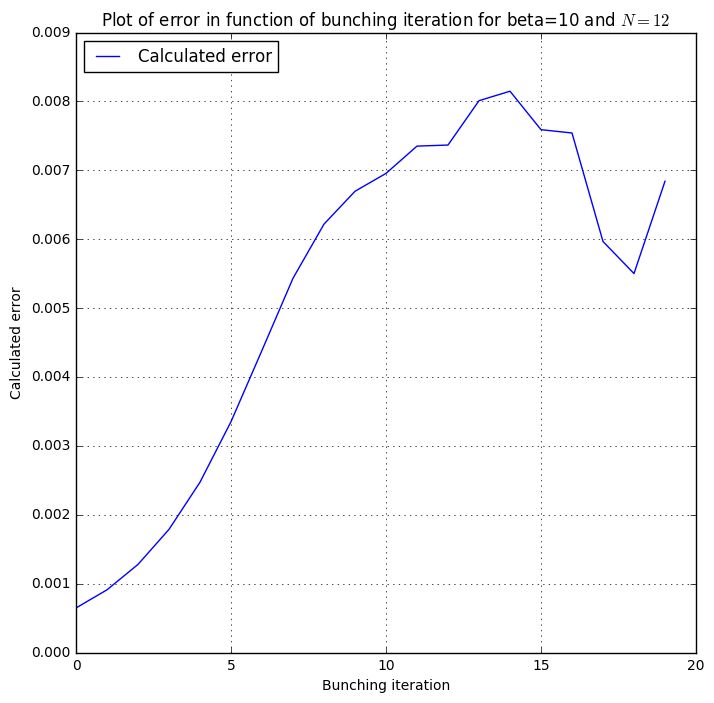

In [13]:
figure = plt.figure(figsize=(8,8))
plt.plot(xrange(len(error)),error,ls = '-', label = "Calculated error")
plt.xlabel("Bunching iteration")
plt.ylabel("Calculated error")
plt.title("Plot of error in function of bunching iteration for beta=10 and $N=12$")
plt.grid()
plt.legend(loc=2)
plt.show()
plt.close()

## Part II

1. According to equation (5) we have : 

$\begin{align*}
\frac{\partial}{\partial \beta} Z_N = \frac{1}{N}\sum_{k=1}^{N} (\partial_\beta z_k)Z_{N-k}+z_k (\partial_\beta Z_{N-k})
\end{align*}$

Meaning that :

$\langle E \rangle = -\frac{\sum_{k=1}^N (\partial_\beta z_k)Z_{N-k}+z_k(\partial_\beta Z_{n-k})}{\sum_{k=1}^N z_k Z_{N-k}  }$


2 . Quite straightforward to prove that :

$\begin{align*}
\partial_\beta z_k &= \partial_\beta \left(\frac{1}{1-\exp(-k\beta)}\right)^3 \\
&= \frac{-3k\exp(-k\beta)}{(1-\exp(-k\beta))^4}\\
&= \frac{-3k\exp(-k\beta)}{1-\exp(-k\beta)}z_k
\end{align*}$

3 . We will first define the relevant functions, as well as a loop that calculates all the values $Z_1,Z_2\ldots Z_n$ as well as the derivatives in $\beta$, which will allow us to calculate the average energy.

In [33]:
def z(k,beta):
    return 1./(1-np.exp(-k*beta))**3

def z_p(k,beta):
    return -3*k*np.exp(-k*beta)/(1-np.exp(-k*beta))*z(k,beta)

def average_energy(N, beta):
    Z, Z_p = np.zeros(N+1), np.zeros(N+1)
    Z[0]=1
    Z_p[0]=0
    for k in xrange(1,N+1):
        Z[k] = 1./float(k)*np.sum([Z[k-j]*z(j,beta) for j in np.arange(1,k+1)])
        Z_p[k]=1./float(k)*np.sum([z_p(j,beta)*Z[k-j]+z(j,beta)*Z_p[k-j] for j in np.arange(1,k+1)])
    return -Z_p[N]/Z[N]

In [34]:
T_star = np.linspace(0.1,2,50)
N = [5, 10, 25, 50, 100,300]
plots = []
for i in xrange(len(N)):
    print "Calculating for N = "+str(N[i])+".........",
    T = N[i]**(1./3.)*T_star
    plot = [average_energy(N[i],1./t) for t in T]
    plots.append(plot)
    print "done"
    
plots=np.asarray(plots)

Calculating for N = 5......... done
Calculating for N = 10......... done
Calculating for N = 25......... done
Calculating for N = 50......... done
Calculating for N = 100......... done
Calculating for N = 300.........

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars


 done


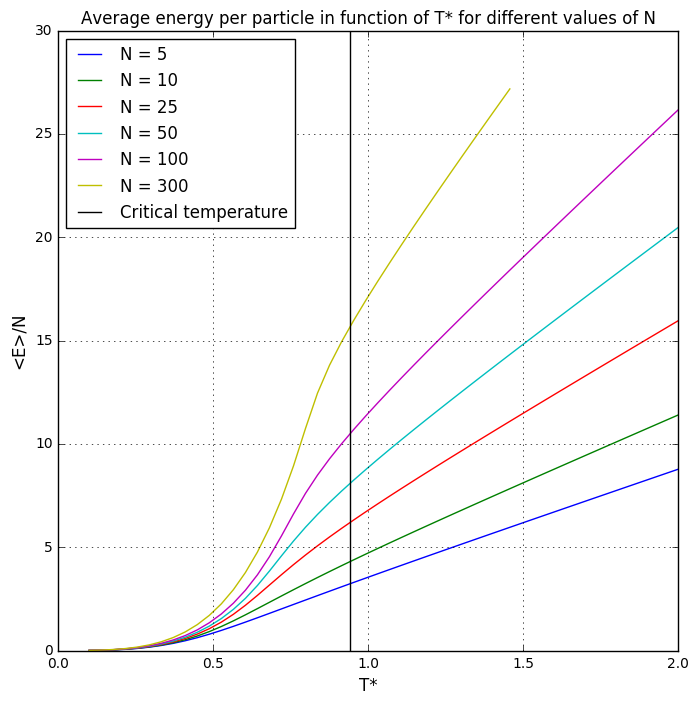

In [36]:
figure = plt.figure(figsize=(8,8))
for i in xrange(len(N)):
    plt.plot(T_star, plots[i]/N[i], ls='-', label="N = "+str(N[i]))
plt.xlabel("T*", fontsize=12)
plt.ylabel("<E>/N", fontsize=12)
plt.axvline(x=(1./1.202)**(1./3.), lw=1, color = 'k', label = "Critical temperature")
plt.legend(loc=2)
plt.grid()
plt.title("Average energy per particle in function of T* for different values of N")
plt.show()
plt.close()

We notice that as $N$ grows larger, the system seems to condensate into the lowest possible energy at a temperature lower to a certain critical temperature $T_C$. Furthermore, we know that the relation between the condensation temperature and the number of particles is : 

$N=\xi(3)\cdot T_c^3$

The advantage of using $T*$ for our plots is that we get plots that are scaled for the same critical temperature, independent of the number of particles $N$. We thus get : 

$T_c* = \frac{1}{\xi(3)^{1/3}}$ 

With $\xi(3)\simeq 1.202$. Using the reduced temperature, all of our $N$ particle systems will condense at the same critical temperature value, which is plotted as a vertical black line in our plot. 

We can always see that below $T_c*$, there is an inflection point in the average energy plot : all the states, except for the fundamental state, are saturated, and all particles start to fall into the lowest-energy state, resulting in a stronger decrease of the energy.

## Part III

1 . We have that 

$W_{\geq k} = \sum_{C(k,N)} \exp(-\beta E(C))$

Where $C(k,N)$ is the set of all allowed configurations of N bosons with at least k bosons in the trap. Since the bosons are independent, we can factor out the energy contribution from $k$ bosons in the fundamental state, with energy $E(0)=1$ : 

$\begin{align}
W_{\geq k}&=\exp(-\beta kE(0))\sum_{C(N-k)}\exp(-\beta (E(C)+kE(0))\\
&= \sum_{C(N-k)}\exp(-\beta E(c))
\end{align}$

Where $C(N-k)$ is the set of all allowed configurations in the harmonic trap for N-k bosons. We thus get $W_{\geq k} = Z_{N-k}$.

2 . If $k=N$, then knowing that there are at least k bosons in the ground state, means that in fact all bosons are in the ground state, and quite simply $W_k=W_{\geq k}$.

If $k<N$, then :


$\begin{align}
W_{\geq k}-W_{\geq k+1} &= \sum_{C(k,N)}\exp(-\beta E(C))-\sum_{C(k+1,N)}\exp(-\beta E(C))\\
&= \sum_{C(k,N)\setminus C(k+1,N)}\exp(-\beta E(C))
\end{align}$

Where $C(k,N)$ is again the set of all configurations with at least $k$ bosons in the trap. Taking the difference between this sum, since we have non interacting bosons, means that we are in fact summing over the difference of sets $C(k,N)\setminus C(k+1,N)$, which is the set of configurations with at least k bosons in the trap, minus the set of configurations with at least k+1 bosons in the trap. The resulting set is the set of configurations with exactly k bosons in the trap. We thus have that, for $k<N$, 

$W_k=W_{\geq k}-W_{\geq k+1}$.

3 . It is now quite straightforward to show that, having $N$ bosons in the harmonic trap, the probability of having $N_0$ bosons in the ground state is $\pi(N_0)=\frac{W_{N_0}}{Z_N}$.

We thus have : 


$\begin{align}
\pi(N_0=N)&=\frac{1}{Z_N}\\
\pi(N_0<N)&=\frac{Z_{N-N_0}-Z_{N-N_0-1}}{Z_N}
\end{align}$

4 .  We therefore have that : 

$\begin{align}
\langle N_0 \rangle &= \sum_{k=0}^N k \pi(k)\\
&= \frac{1}{Z_N}\sum_{k=0}^{N-1} k(Z_{N-k}-Z_{N-{k+1}})+\frac{N}{Z_N}\\
&= \frac{1}{Z_N} \left( Z_{N-1}-Z_{N-2}+2Z_{N-2}-2Z_{N-3}+\ldots+(N-2)Z_{2}-(N-2)Z_{1}+(N-1)Z_1-(N-1)+N\right)\\
&= \frac{\sum_{p=0}^{N-1}Z_p}{Z_N}
\end{align}$

Let us now implement this formula : 

In [37]:
def average_n0(N, beta):
    Z= np.zeros(N+1)
    Z[0]=1
    for k in xrange(1,N+1):
        Z[k] = 1./float(k)*np.sum([Z[k-j]*z(j,beta) for j in np.arange(1,k+1)])
        
    return np.sum(Z)/Z[N]-1.

In [38]:
T_star = np.linspace(0.1,2,50)
N = [5, 10, 25, 50, 100,300]
plots = []
for i in xrange(len(N)):
    print "Calculating for N = "+str(N[i])+".........",
    T = N[i]**(1./3.)*T_star
    plot = [average_n0(N[i],1./t) for t in T]
    plots.append(plot)
    print "done"
    
plots=np.asarray(plots)

Calculating for N = 5......... done
Calculating for N = 10......... done
Calculating for N = 25......... done
Calculating for N = 50......... done
Calculating for N = 100......... done
Calculating for N = 300.........

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


 done


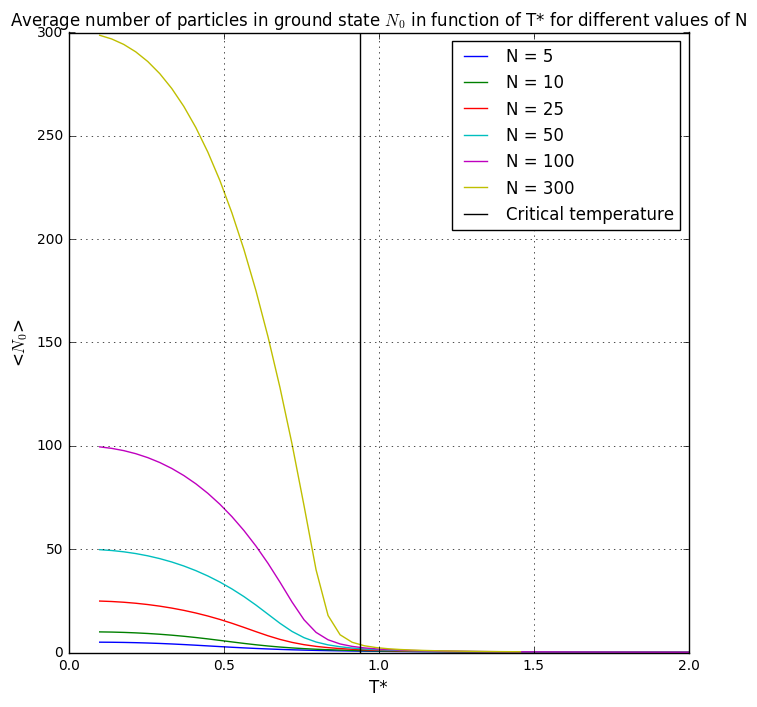

In [42]:
figure = plt.figure(figsize=(8,8))
for i in xrange(len(N)):
    plt.plot(T_star, plots[i], ls='-', label="N = "+str(N[i]))
plt.xlabel("T*", fontsize=12)
plt.ylabel("<$N_0$>", fontsize=12)
plt.axvline(x=(1./1.202)**(1./3.), lw=1, color = 'k', label = "Critical temperature")
plt.legend(loc=1)
plt.grid()
plt.title("Average number of particles in ground state $N_0$ in function of T* for different values of N")
plt.show()
plt.close()

We have therefore a more visual graph showing us the phenomenon of Bose-Einstein condensation : below the critical temperature, the number of particles in the ground state explodes, and close to $T*=0$ we even get that the average number of particles in the ground state is actually $N$ : all the particles are in the ground state. 

Bonus : 

In this case we are sampling the speeds of a large number of particles, where each particle has a Maxwell-Boltzmann distribution. We are not in fact sampling a sphere, but if we calculate the average value for $v_{xi}^2$ we do indeed get $\frac{kT}{m}$, summing over all components we get that  $\langle\vec{v_i}^2\rangle = 3\frac{kT}{m}$. Meaning that : 
$\langle\sum \vec{v_i}^2\rangle = N \frac{E}{m}$.

However we know that the variance of this sum goes to 0 as $\frac{1}{\sqrt{N}}$. We are therefore sampling not over the surface of a hypersphere, but over a region near the surface of the hypersphere of thickness $\frac{1}{\sqrt{N}}$, that is the region defined by $\vec{r}^2 = R\pm\frac{1}{\sqrt{N}} $. As $N\rightarrow \infty$, this region becomes more and more like the surface of the hypersphere.

Indeed, if we fix the constraint that the sum of the energies of the particles is fixed, it amounts to working in the microcanonical ensemble, where we indeed sample over the surface of a hypersphere. Instead, we couple the system to a thermal bath of temperature $T$ that imposes an average energy, which means that we work in the canonical ensemble. We know from thermodynamics that at large number of particles the microcanonical and canonical ensemble are equivalent, which is what we just said : at large $N$, we are indeed sampling the surface of the hypersphere (up to a factor of magnitude $\frac{1}{\sqrt{N}}$).